In [1]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,533.96,543.41,522.18,530.38,26153300
1,2012-05-21,534.50,561.54,534.05,561.28,22539500
2,2012-05-22,569.55,573.88,552.58,556.97,24816800
3,2012-05-23,557.50,572.80,553.23,570.56,20889200
4,2012-05-24,575.87,576.50,561.23,565.32,17722500


In [3]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date    Open    High     Low   Close    Volume
0  2012-05-18  533.96  543.41  522.18  530.38  26153300
1  2012-05-21  534.50  561.54  534.05  561.28  22539500
2  2012-05-22  569.55  573.88  552.58  556.97  24816800
3  2012-05-23  557.50  572.80  553.23  570.56  20889200
4  2012-05-24  575.87  576.50  561.23  565.32  17722500


In [4]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2




            Date    Open      High     Low   Close    Volume  MA for 5 days  \
0     2012-05-18  533.96  543.4100  522.18  530.38  26153300            NaN   
1     2012-05-21  534.50  561.5400  534.05  561.28  22539500            NaN   
2     2012-05-22  569.55  573.8800  552.58  556.97  24816800            NaN   
3     2012-05-23  557.50  572.8000  553.23  570.56  20889200            NaN   
4     2012-05-24  575.87  576.5000  561.23  565.32  17722500        556.902   
...          ...     ...       ...     ...     ...       ...            ...   
2668  2022-12-23  130.92  132.4150  129.64  131.86  63814893        132.842   
2669  2022-12-27  131.38  131.4100  128.72  130.03  69007830        132.374   
2670  2022-12-28  129.67  131.0275  125.87  126.04  85438391        131.122   
2671  2022-12-29  127.99  130.4814  127.73  129.61  75703710        129.954   
2672  2022-12-30  128.41  129.9500  127.43  129.93  77034209        129.494   

      MA for 10 days  MA for 20 days  MA for 50 day

,count,mean,std,min,25%,50%,75%,max
Open,2673.0,2.324052e+02,1.590956e+02,9.000000e+01,1.247500e+02,1.600200e+02,2.736100e+02,7.024100e+02
High,2673.0,2.347171e+02,1.604763e+02,9.070000e+01,1.260800e+02,1.621400e+02,2.784100e+02,7.050700e+02
Low,2673.0,2.300620e+02,1.574957e+02,8.947000e+01,1.233600e+02,1.582800e+02,2.693700e+02,6.995700e+02
Close,2673.0,2.324519e+02,1.590133e+02,9.028000e+01,1.248500e+02,1.598800e+02,2.750300e+02,7.021000e+02
Volume,2673.0,4.620639e+07,3.555378e+07,5.704900e+06,2.146950e+07,3.403934e+07,6.315240e+07,3.326072e+08
MA for 5 days,2669.0,2.322922e+02,1.583889e+02,9.065600e+01,1.249540e+02,1.601380e+02,2.758800e+02,7.005172e+02
MA for 10 days,2664.0,2.320745e+02,1.576662e+02,9.128800e+01,1.255370e+02,1.609815e+02,2.753243e+02,6.910966e+02
MA for 20 days,2654.0,2.316193e+02,1.562597e+02,9.244440e+01,1.258783e+02,1.621837e+02,2.730378e+02,6.807860e+02
MA for 50 days,2624.0,2.301151e+02,1.520758e+02,9.461026e+01,1.267486e+02,1.629973e+02,2.778521e+02,6.617146e+02
EMA for 5 days,2673.0,2.327515e+02,1.584799e+02,9.167770e+01,1.254109e+02,1.609124e+02,2.764815e+02,6.974856e+02


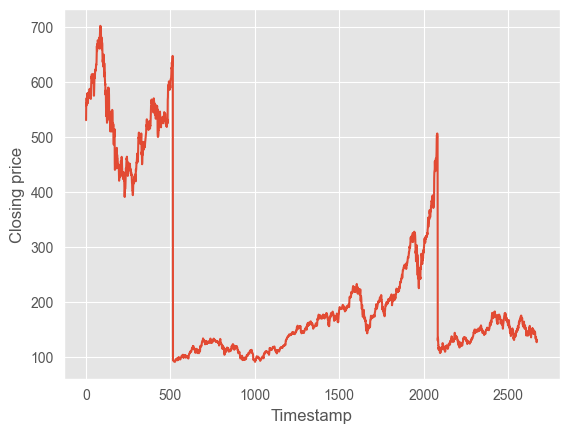

In [5]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [7]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14,MACD
49,2012-07-30,590.920,599.44,587.82,595.030,13540800,586.19200,596.66100,600.583500,583.068820,589.709405,593.146412,593.761047,581.828068,42.308590,1.901959
50,2012-07-31,603.230,611.70,602.72,610.760,16511700,588.16000,597.04300,601.495500,584.676420,596.726270,596.348883,595.379995,582.962654,53.241831,3.108114
51,2012-08-01,615.905,616.40,603.00,606.810,13732200,594.52800,597.09800,601.865500,585.587020,600.087513,598.250904,596.468567,583.897844,54.117647,3.702588
52,2012-08-02,602.840,610.69,600.25,607.790,11862800,601.11000,596.44500,601.758000,586.603420,602.655009,599.985285,597.546799,584.834791,51.550132,4.204325
53,2012-08-03,613.630,617.98,611.56,615.700,12318600,607.21800,597.58500,602.249000,587.506220,607.003339,602.842506,599.275675,586.045192,54.534200,5.180509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2014-07-21,94.990,95.00,93.72,93.939,39079000,94.31178,94.90039,93.664095,302.183688,94.302196,95.701853,120.118498,242.848956,54.698618,-47.402022
545,2014-07-22,94.680,94.89,94.12,94.720,55197000,94.19178,94.83739,93.858595,292.367238,94.441464,95.523334,117.699593,237.039978,55.490383,-44.144904
546,2014-07-23,95.420,97.88,95.17,97.190,92918000,94.67378,95.01739,94.204095,282.454438,95.357643,95.826365,115.746299,231.555665,63.886601,-40.892917
547,2014-07-24,97.035,97.32,96.42,97.030,45729000,95.46180,95.21689,94.537595,272.519838,95.915095,96.045207,113.963794,226.280149,61.566756,-37.891812


In [8]:
# updated Code

feature_columns = [
    'Close',          # Most important feature (direct price information)
    'Low',            # Important price-related feature
    'High',           # Important price-related feature
    'Open',           # Important price-related feature
    'EMA for 5 days', # Short-term trend indicator
    'MA for 5 days',  # Short-term trend indicator
    'RSI_14'          # Momentum indicator
]

from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
# for i in range(1, len(df) - window_size - 1, 1):
#     first_close = df.iloc[i, 4]  # Normalize using "Close" price
#     temp = []
#     temp2 = []
#     for j in range(window_size):
#         # Normalize "Close" and include RSI_14 as a second feature
#         normalized_close = (df.iloc[i + j, 4] - first_close) / first_close
#         rsi_14 = df.iloc[i + j, -1]  # Assuming RSI_14 is the last column
#         temp.append([normalized_close, rsi_14])  # Add both features as a pair
#     temp2.append((df.iloc[i + window_size, 4] - first_close) / first_close)  # Use "Close" for target
#     X.append(np.array(temp))  # Each sample has shape (100, 2)
#     Y.append(np.array(temp2).reshape(1, 1))

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, df.columns.get_loc('Close')]  # Normalize using "Close" price
    temp = []
    temp2 = []
    
    for j in range(window_size):
        # Normalize each feature in the feature_columns list
        normalized_features = []
        for feature in feature_columns:
            if feature == 'Close':
                # Normalize "Close" relative to the first_close
                normalized_value = (df.iloc[i + j, df.columns.get_loc(feature)] - first_close) / first_close
            else:
                # For other features, normalize them directly (or use their raw values if normalization isn't required)
                normalized_value = df.iloc[i + j, df.columns.get_loc(feature)]
            normalized_features.append(normalized_value)
        
        # Append the normalized features for this time step
        temp.append(normalized_features)
    
    # Calculate the target (normalized change in "Close" price)
    target = (df.iloc[i + window_size, df.columns.get_loc('Close')] - first_close) / first_close
    temp2.append(target)
    
    # Append the input and target to X and Y
    X.append(np.array(temp))  # Each sample has shape (window_size, len(feature_columns))
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Verify the shape of train_X
print("Shape of train_X before reshaping:", train_X.shape)

# Reshaping the data for CNN models
# Assuming train_X has shape (num_samples, window_size, num_features)
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1], train_X.shape[2])  
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1], test_X.shape[2])

# Printing the number of training and testing samples
print("Shape of train_X after reshaping:", train_X.shape)
print("Shape of test_X after reshaping:", test_X.shape)
print("Number of training samples:", len(train_X))
print("Number of testing samples:", len(test_X))

Shape of train_X before reshaping: (2085, 15, 7)
Shape of train_X after reshaping: (2085, 1, 15, 7)
Shape of test_X after reshaping: (522, 1, 15, 7)
Number of training samples: 2085
Number of testing samples: 522


In [9]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [21]:
from tensorflow.keras.models import load_model
from AttentionLayer import Attention

from tensorflow.keras.models import load_model
from AttentionLayer import AttentionLayer  # Import from the separate file

# Load the model with the custom AttentionLayer
improved_model = load_model('improved_model.keras', custom_objects={'AttentionLayer': AttentionLayer})




ModuleNotFoundError: No module named 'AttentionLayer'